<a href="https://colab.research.google.com/github/salomeeja/algo_trading/blob/main/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('sample_data/california_housing_test.csv')

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [21]:
import pandas as pd
import matplotlib.pyplot as plt 
import os 

In [23]:
def symbol_to_path(symbol, base_dir='sample_data'):
  return os.path.join(base_dir, f'{symbol}.csv') 

In [30]:
symbols = ['KO', 'RBLX']

def get_data(symbols, dates):
  df = pd.DataFrame(index=dates)
  if 'KO' not in symbols:
    symbols.insert(0, 'KO')

  for symbol in symbols:
    df_temp=pd.read_csv(
        symbol_to_path(symbol),
        index_col='Date',
        parse_dates=True,
        #tarigad rom caikitxos da ara stringad
        usecols=['Date', 'Adj Close'],
        na_values=['nan']
   )
    
    df_temp =df_temp.rename(columns={'Adj Close': symbol})
    df = df.join(df_temp)
    df = df.dropna()

  return df


In [34]:
dates = pd.date_range('2021-10-01', '2021-10-31')
get_data(symbols, dates)

,KO,RBLX
2021-10-04,53.703537,77.800003
2021-10-11,54.060768,70.220001
2021-10-18,54.031002,77.800003
2021-10-25,55.936226,83.209999


In [40]:
def main():
  dates =pd.date_range('2021-10-01', '2021-10-31')
  symbols = ['KO', 'RBLX']
  df = get_data(symbols, dates)
  print(df.mean())
  print(df.median())
  print(df.std())
  #standartuli gadaxra tu didia upro gafantulia da sariskoa
  

if __name__ =='__main__':
  main()

KO      54.432883
RBLX    77.257502
dtype: float64
KO      54.045885
RBLX    77.800003
dtype: float64
KO      1.015212
RBLX    5.340014
dtype: float64


In [67]:
def get_rolling_mean(values, window):
  return values.rolling(window).mean()

In [68]:
def get_rolling_std(values, window):
  return values.rolling(window).std()

In [69]:
def get_bollinger_band(rm, rstd):
  upper_band = rm * rstd * 2
  lower_band = rm - rstd * 2
  return upper_band, lower_band

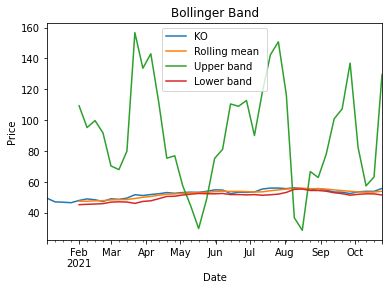

In [77]:
def main():
  dates =pd.date_range('2021-01-01', '2021-10-31')
  symbols = ['KO']
  df = get_data(symbols, dates)

  rm_KO = get_rolling_mean(df['KO'], window=5)

  rstd_KO = get_rolling_std(df['KO'], window=5)

  upper_band, lower_band = get_bollinger_band(rm_KO, rstd_KO)

  ax = df['KO'].plot(title='Bollinger Band', label='KO')
  rm_KO.plot(label='Rolling mean ', ax=ax)
  upper_band.plot(label='Upper band', ax=ax)
  lower_band.plot(label='Lower band', ax=ax)

  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  ax.legend()

if __name__ =='__main__':
  main()

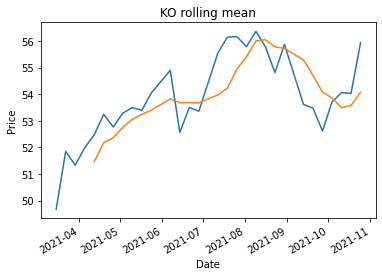

In [70]:
def main():
  dates =pd.date_range('2021-01-01', '2021-10-31')
  symbols = ['KO', 'RBLX']
  df = get_data(symbols, dates)


  ax = df['KO'].plot(title='KO rolling mean', label='KO')
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')


  rm_KO =df['KO'].rolling(window=5).mean()
  rm_KO.plot(label='Rolling mean', ax=ax)

  

if __name__ =='__main__':
  main()

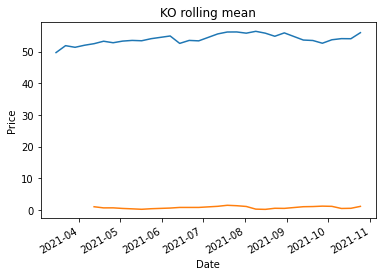

In [65]:
def main():
  dates =pd.date_range('2021-01-01', '2021-10-31')
  symbols = ['KO', 'RBLX']
  df = get_data(symbols, dates)


  ax = df['KO'].plot(title='KO rolling mean', label='KO')
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')


  rm_KO =df['KO'].rolling(window=5).std()
  rm_KO.plot(label='Rolling mean', ax=ax)

  

if __name__ =='__main__':
  main()